In [1]:
pwd

'C:\\Users\\Rose'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df= pd.read_csv('Churn_Modelling_24.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0.0


In [4]:
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0.0
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.012814,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation 

Rows are starting from 0- 10000 which is what we expected. Dataset is ok with respect to indexes

## Section 1: Data Types & NaN Handling

### a. Analyse data types of features and convert appropriate object columns to 'category'.
### b. Handle null values in the 'Tenure' column by replacing them with the mean.


In [7]:
# Display data types of all columns
df.dtypes

RowNumber          float64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
Unnamed: 11        float64
HasCrCard           object
IsActiveMember      object
Churn              float64
dtype: object

In [8]:
# Convert object columns with categorical data to 'category' type
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Verify changes
df.dtypes

RowNumber           float64
CustomerId          float64
Surname            category
CreditScore         float64
Geography          category
Gender             category
Age                 float64
Tenure              float64
Balance             float64
NumOfProducts       float64
EstimatedSalary     float64
Unnamed: 11         float64
HasCrCard          category
IsActiveMember     category
Churn               float64
dtype: object

In [9]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Fill NaN in 'Tenure' column with mean value
if 'Tenure' in df.columns:
    df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())

Missing values per column:
RowNumber              1
CustomerId             1
Surname                1
CreditScore            1
Geography              1
Gender                 1
Age                    1
Tenure                11
Balance                1
NumOfProducts          1
EstimatedSalary        1
Unnamed: 11        10001
HasCrCard              1
IsActiveMember         1
Churn                  1
dtype: int64


### ✅ Observations:
- All object-type categorical columns have been converted to 'category' data type.
- Any missing values in the 'Tenure' column have been replaced using the column's mean.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  float64 
 1   CustomerId       10000 non-null  float64 
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  float64 
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  float64 
 7   Tenure           10001 non-null  float64 
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  float64 
 10  EstimatedSalary  10000 non-null  float64 
 11  Unnamed: 11      0 non-null      float64 
 12  HasCrCard        10000 non-null  category
 13  IsActiveMember   10000 non-null  category
 14  Churn            10000 non-null  float64 
dtypes: category(5), float64(10)
memory usage: 928.0 KB


Observation

Dataset shows that Tenure has some missing information. All the others have 10000 non null values

### Section 1 a) Analyse data types of features

In [14]:
df.dtypes

RowNumber           float64
CustomerId          float64
Surname            category
CreditScore         float64
Geography          category
Gender             category
Age                 float64
Tenure              float64
Balance             float64
NumOfProducts       float64
EstimatedSalary     float64
Unnamed: 11         float64
HasCrCard          category
IsActiveMember     category
Churn               float64
dtype: object

In [15]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = df[column].astype('category')

df.dtypes

RowNumber           float64
CustomerId          float64
Surname            category
CreditScore         float64
Geography          category
Gender             category
Age                 float64
Tenure              float64
Balance             float64
NumOfProducts       float64
EstimatedSalary     float64
Unnamed: 11         float64
HasCrCard          category
IsActiveMember     category
Churn               float64
dtype: object

### Section 1 b) check for Nan values in data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  float64 
 1   CustomerId       10000 non-null  float64 
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  float64 
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  float64 
 7   Tenure           10001 non-null  float64 
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  float64 
 10  EstimatedSalary  10000 non-null  float64 
 11  Unnamed: 11      0 non-null      float64 
 12  HasCrCard        10000 non-null  category
 13  IsActiveMember   10000 non-null  category
 14  Churn            10000 non-null  float64 
dtypes: category(5), float64(10)
memory usage: 928.0 KB


In [18]:
df.isnull().sum()

RowNumber              1
CustomerId             1
Surname                1
CreditScore            1
Geography              1
Gender                 1
Age                    1
Tenure                 0
Balance                1
NumOfProducts          1
EstimatedSalary        1
Unnamed: 11        10001
HasCrCard              1
IsActiveMember         1
Churn                  1
dtype: int64

In [19]:
#remove null values for ‘Tenure’ column using mean() applied to it.
mean_tenure = df['Tenure'].mean()
df['Tenure'].fillna(mean_tenure, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  float64 
 1   CustomerId       10000 non-null  float64 
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  float64 
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  float64 
 7   Tenure           10001 non-null  float64 
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  float64 
 10  EstimatedSalary  10000 non-null  float64 
 11  Unnamed: 11      0 non-null      float64 
 12  HasCrCard        10000 non-null  category
 13  IsActiveMember   10000 non-null  category
 14  Churn            10000 non-null  float64 
dtypes: category(5), float64(10)
memory usage: 928.0 KB


In [20]:
df.isnull().sum()

RowNumber              1
CustomerId             1
Surname                1
CreditScore            1
Geography              1
Gender                 1
Age                    1
Tenure                 0
Balance                1
NumOfProducts          1
EstimatedSalary        1
Unnamed: 11        10001
HasCrCard              1
IsActiveMember         1
Churn                  1
dtype: int64

### Section 2a) Check for duplicates, view duplicated rows, and remove them, if any.

In [22]:
x= df.duplicated()
df[x==True]
#duplicated_rows = df.duplicated()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn


There are no duplicates in the dataset

### Section 2 b) check for outliers

In [25]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0.0


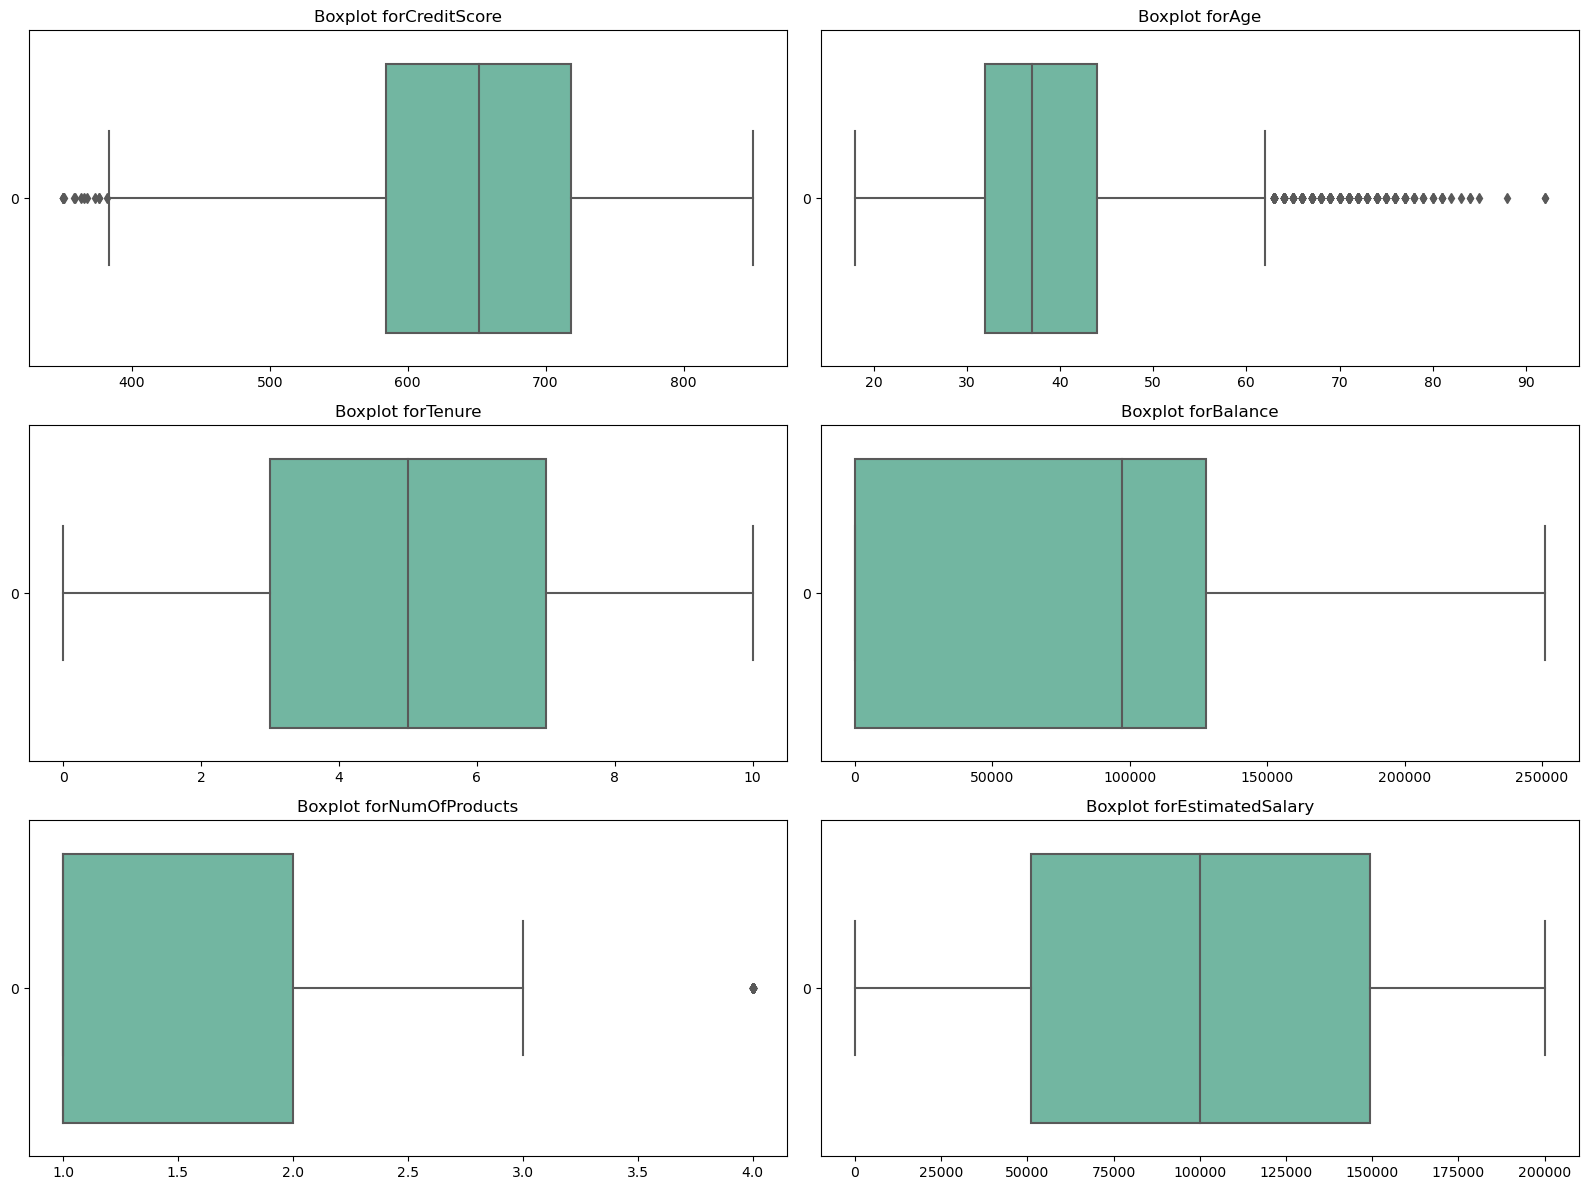

In [26]:
#Checking for outliers using box plot and remove them if any
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(df[feature], orient='h', palette='Set2')
    plt.title('Boxplot for'+ feature)

plt.tight_layout()
plt.show()

Observation 

There are outliers in the following columns, CreditScore, NumOfProducts and Age

In [28]:
#Checking for outliers using statistical method and removing them
# Calculate quartiles and IQR
q1 = np.quantile(df['Age'], 0.25)
q3 = np.quantile(df['Age'], 0.75)
IQR = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Identify outliers
outliers = (df['Age'] < lower_bound) | (df['Age'] > upper_bound)

# Print the outliers, if any
if outliers.any():
   # print("Outliers in column:")
    print(df[outliers])
else:
    print("No outliers found in  column.")

No outliers found in  column.


In [29]:
missing_values = df['CreditScore'].isnull().sum()
print("Number of missing values in 'CreditScore' column:", missing_values)

Number of missing values in 'CreditScore' column: 1


In [30]:
median_CreditScore = df['CreditScore'].median()
df['CreditScore'] = df['CreditScore'].fillna(median_CreditScore)

In [31]:
missing_values = df['CreditScore'].isnull().sum()
print("Number of missing values in 'CreditScore' column:", missing_values)

Number of missing values in 'CreditScore' column: 0


In [32]:
missing_values = df['NumOfProducts'].isnull().sum()
print("Number of missing values in 'NumOfProducts' column:", missing_values)

Number of missing values in 'NumOfProducts' column: 1


In [33]:
median_NumOfProducts = df['NumOfProducts'].median()
df['NumOfProducts'] = df['NumOfProducts'].fillna(median_NumOfProducts)

In [34]:
missing_values = df['NumOfProducts'].isnull().sum()
print("Number of missing values in 'NumOfProducts' column:", missing_values)

Number of missing values in 'NumOfProducts' column: 0


In [35]:
missing_values = df['Age'].isnull().sum()
print("Number of missing values in 'Age' column:", missing_values)

Number of missing values in 'Age' column: 1


In [36]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

In [37]:
missing_values = df['Age'].isnull().sum()
print("Number of missing values in 'Age' column:", missing_values)

Number of missing values in 'Age' column: 0


In [38]:
q1=np.quantile(df['CreditScore'],0.25)
q3=np.quantile(df['CreditScore'],0.75)
IQR=q3-q1
print("The First quartile is", q1)
print("The Third quartile is", q3)
print("The Interquartilerange is", IQR)

The First quartile is 584.0
The Third quartile is 718.0
The Interquartilerange is 134.0


In [39]:
q1=np.quantile(df['NumOfProducts'],0.25)
q3=np.quantile(df['NumOfProducts'],0.75)
IQR=q3-q1
print("The First quartile is", q1)
print("The Third quartile is", q3)
print("The Interquartilerange is", IQR)

The First quartile is 1.0
The Third quartile is 2.0
The Interquartilerange is 1.0


In [40]:
q1=np.quantile(df['Age'],0.25)
q3=np.quantile(df['Age'],0.75)
IQR=q3-q1
print("The First quartile is", q1)
print("The Third quartile is", q3)
print("The Interquartilerange is", IQR)

The First quartile is 32.0
The Third quartile is 44.0
The Interquartilerange is 12.0


In [41]:
# Function to remove outliers based on IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    df = df[~outliers]  # Using ~ to negate the boolean mask AS WE WANT TO REMOVE THEM

    return df

# Select columns for outlier removal
columns_to_remove_outliers = ['NumOfProducts', 'Age', 'CreditScore']

# Remove outliers for each specified column
for col in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, col)

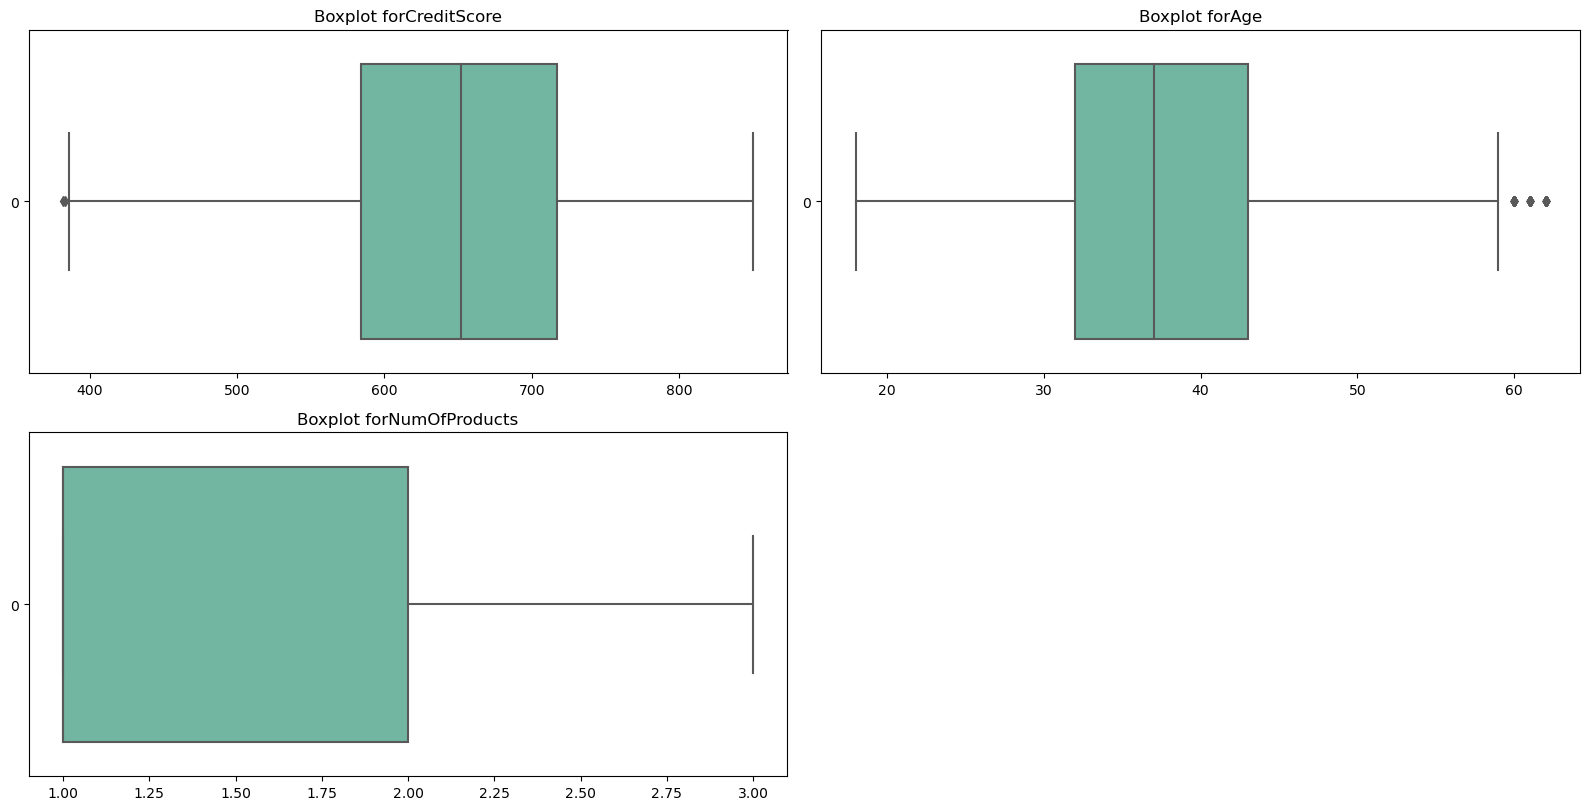

In [42]:
#Showing updated results after the removal of the outliers

numeric_features = ['CreditScore', 'Age', 'NumOfProducts']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(df[feature], orient='h', palette='Set2')
    plt.title('Boxplot for' + feature)

plt.tight_layout()

plt.show()

### Section 2 c) Countplot

In [44]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0.0


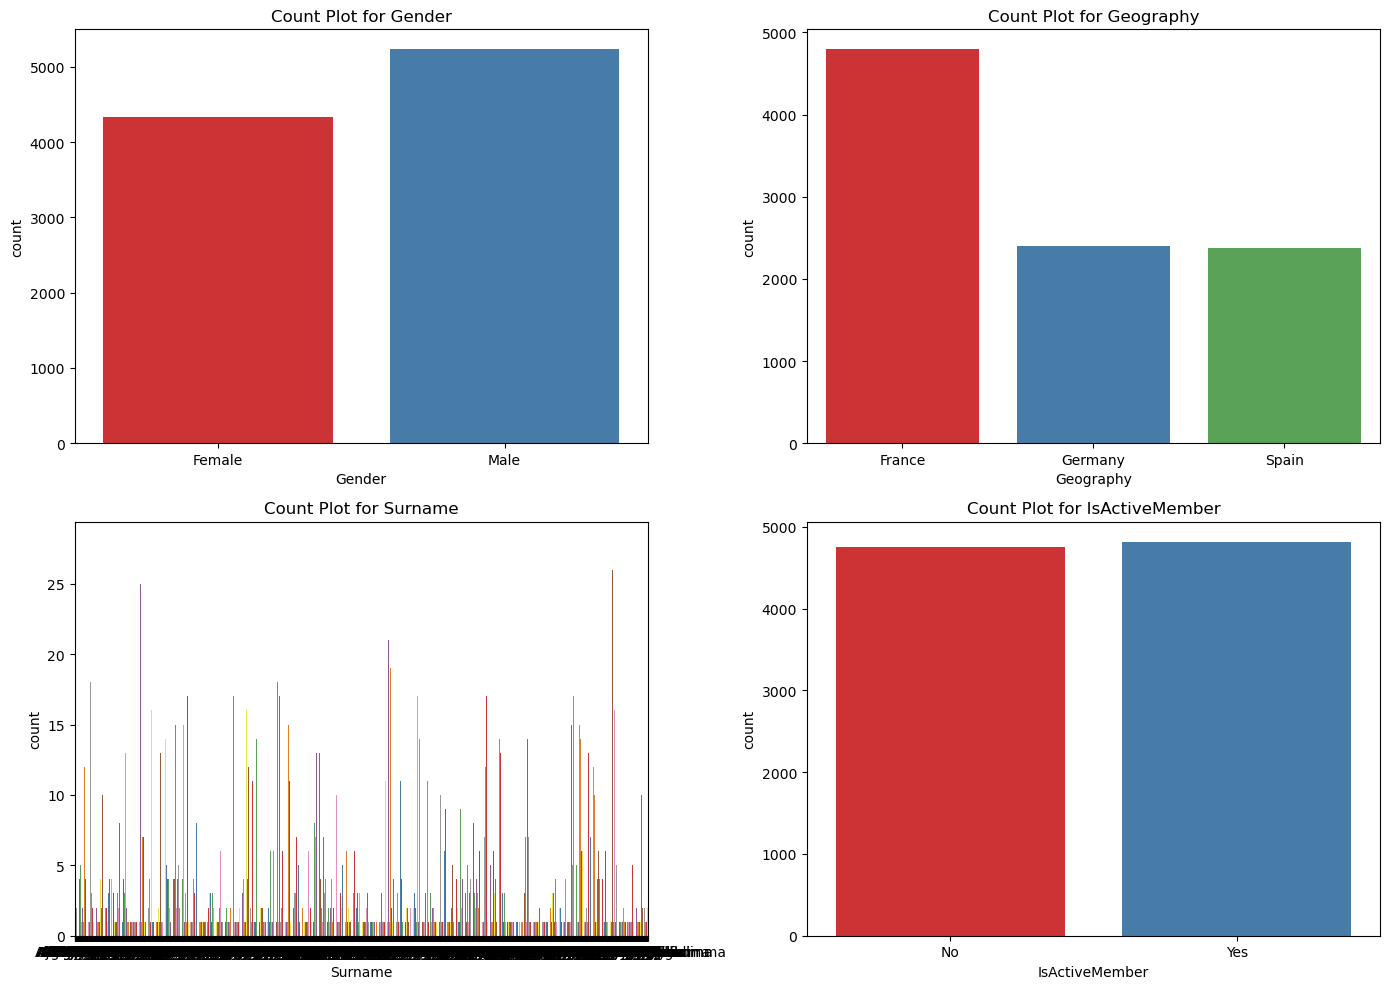

In [45]:
#Drawing count plots for categorical features
#These count plots provide a visual representation of the distribution of categorical features in your dataset, aiding in understanding the data and identifying patterns or imbalances

categorical_features = ['Gender', 'Geography', 'Surname', 'IsActiveMember']

plt.figure(figsize=(14, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=df, palette='Set1')
    plt.title(f'Count Plot for {feature}')

plt.tight_layout()
plt.show()


Observations

1. There are more active members than not active, but there is no much difference.
2. The number of male customers is more than female customers
3. Most customers are from France will not churn
4. German has the most customers to leave

### Section c) draw a histogram

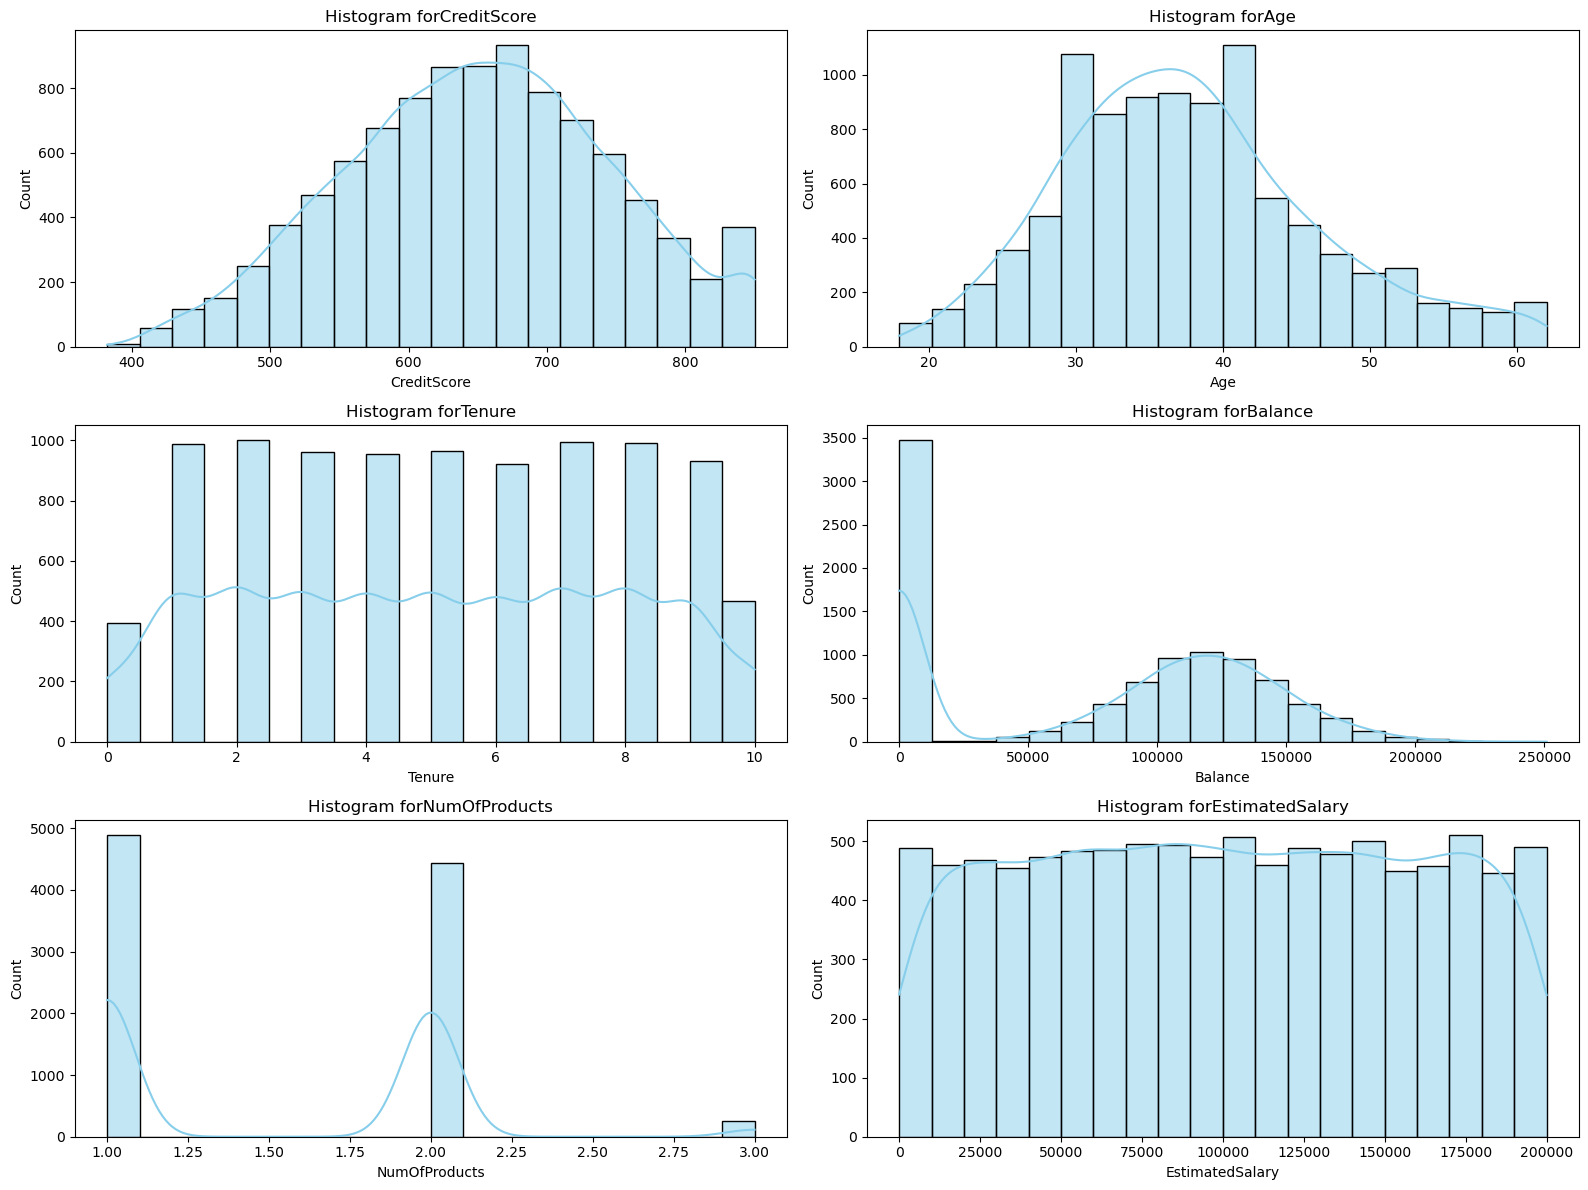

In [48]:
#histograms to visualize the distribution of numeric features and then compute the skewness of variables.
#Drawing histograms for numeric features

numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], bins=20, kde=True, color='skyblue')
    plt.title('Histogram for' + feature)

plt.tight_layout()
plt.show()

Comment:

CreditScore is negatively skewed
Age is positevly skewed
Tenure and Salary indicate a symmetric distibution

652.0
850.0
382.0
650.6628004179728
-0.04755685815794663


C:\Users\Rose\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


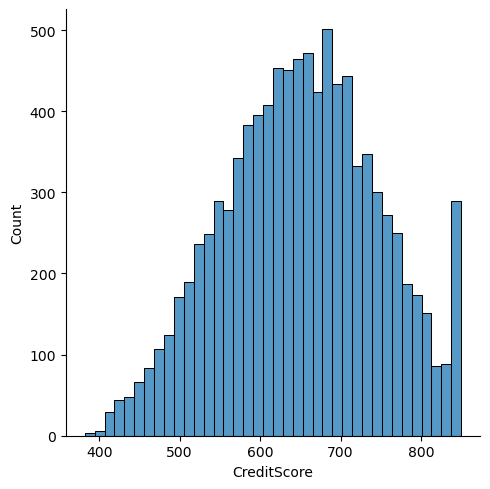

In [50]:
sns.displot(x='CreditScore', data= df )
print(df['CreditScore'].median())
print(df['CreditScore'].max())
print(df['CreditScore'].min())
print(df['CreditScore'].mean())

### Compute skewness
print(df['CreditScore'].skew())

### Section 3 a) joint plot with hue parameter

In [52]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0.0


C:\Program Files\KMSpico\temp\ipykernel_8964\2293089905.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


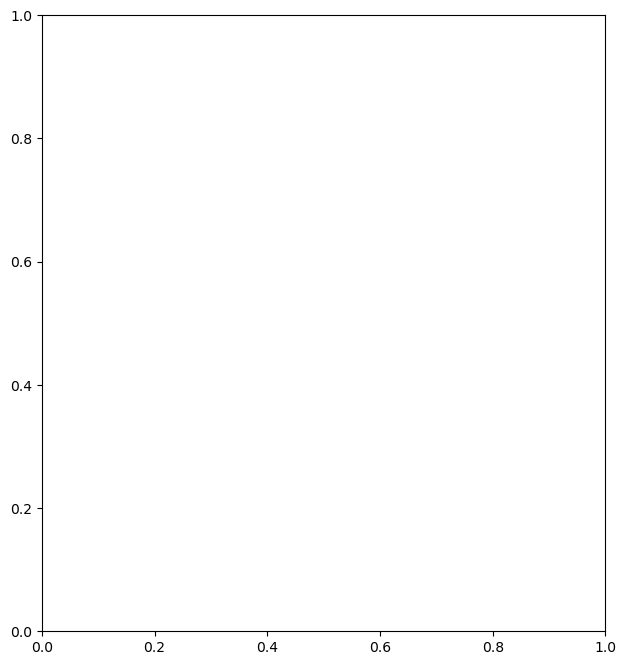

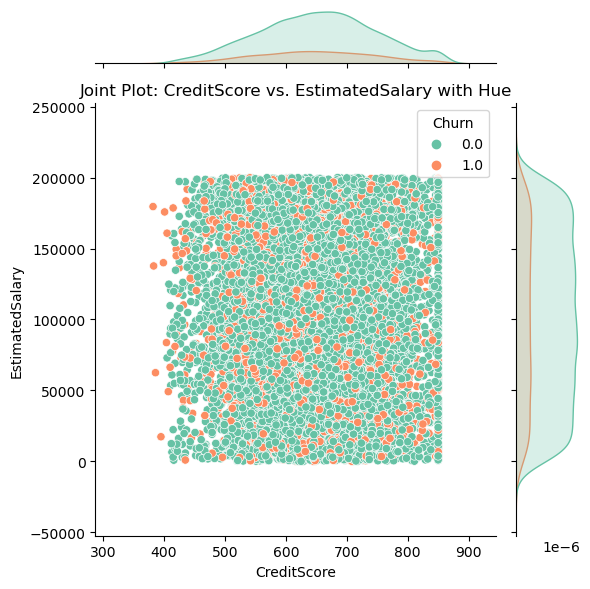

In [53]:
#Joint plot for the same two pairs of variables
plt.figure(figsize=(16, 8))

# Joint plot for CreditScore vs. EstimatedSalary with 'Churn' as hue
plt.subplot(1, 2, 2)
sns.jointplot(x='CreditScore', y='EstimatedSalary', hue='Churn', data=df, palette='Set2', kind='scatter')
plt.title('Joint Plot: CreditScore vs. EstimatedSalary with Hue')

plt.tight_layout()
plt.show()

Observation

1. Scatter Plot Visualization
The x-axis represents 'CreditScore', the y-axis represents 'EstimatedSalary', and the points are colored according to the 'Churn' variable.
2. The histograms provide insights into the distribution of each variable independently.
3. The points tend to cluster together in a particular direction, it suggests a correlation between the variables
4. Overall, the joint plot provides a comprehensive visualization of the relationship between 'CreditScore' and 'EstimatedSalary', taking into account their distributions and the impact of churn status. It helps in understanding potential correlations and patterns in the data.

### Section 3 b) scatter plot with hue parameter

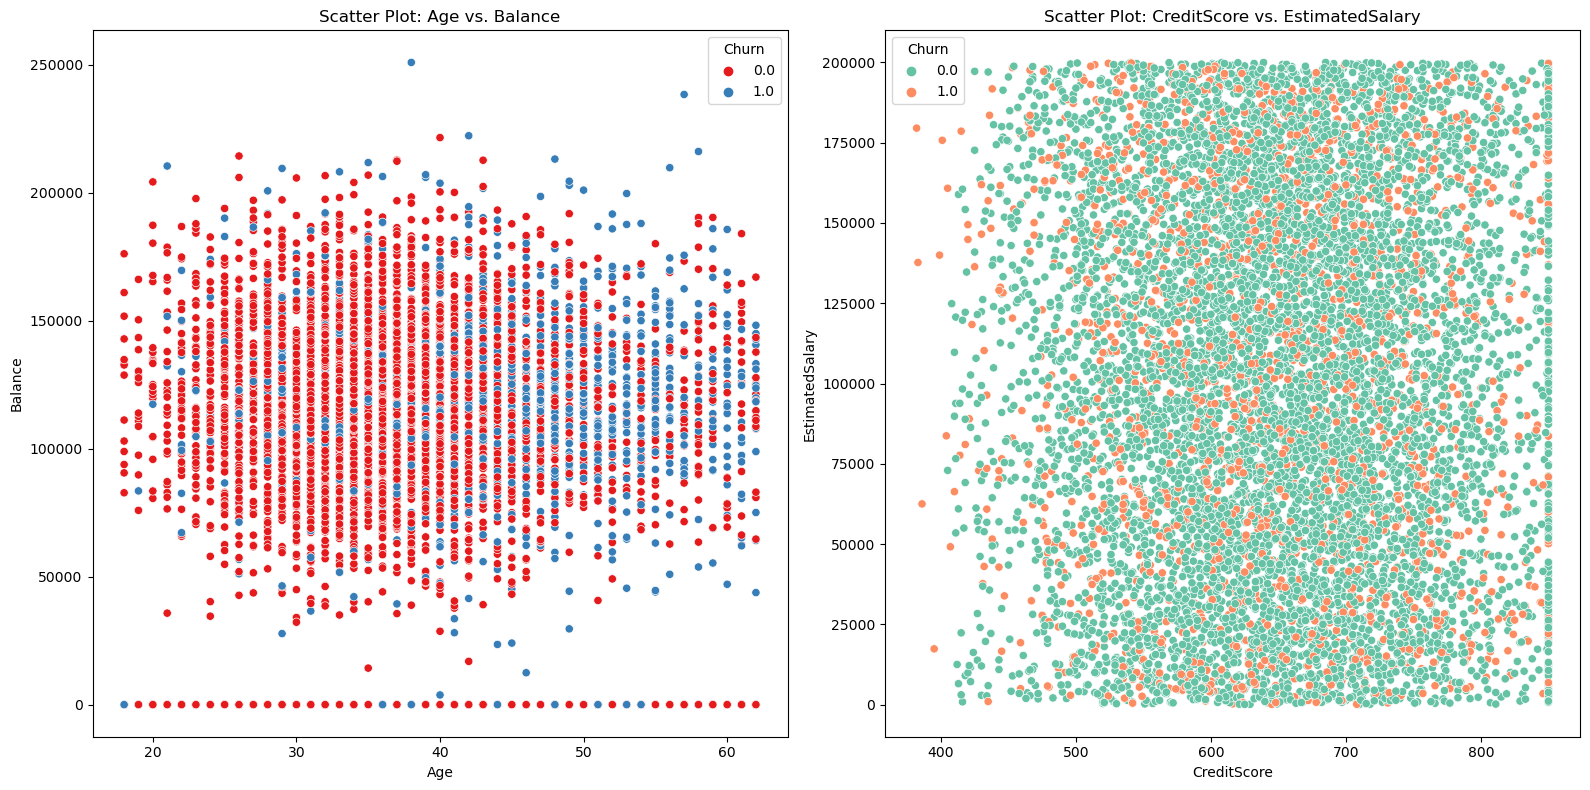

In [56]:
#Scatter plots with 'hue' parameter
plt.figure(figsize=(16, 8))

# Scatter plot for Age vs. Balance with 'Churn' as hue
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Balance', hue='Churn', data=df, palette='Set1')
plt.title('Scatter Plot: Age vs. Balance')

# Scatter plot for CreditScore vs. EstimatedSalary with 'Churn' as hue 
plt.subplot(1, 2, 2)
sns.scatterplot(x='CreditScore', y='EstimatedSalary', hue='Churn', data=df, palette='Set2')
plt.title('Scatter Plot: CreditScore vs. EstimatedSalary')

plt.tight_layout()
plt.show()

Observation

1. There are outliers in the following columns, CreditScore, NumOfProducts and Age
2. There's a noticeable difference in the distribution of points for customers who churned compared to those who didn't.
3. It looks like customers who churned are the most are between the age of 20 up to 45

### Section 3 c)  Scaling method

In [59]:
#Apply any scaling method to for all numeric features
from sklearn.preprocessing import MinMaxScaler


# Extracting numeric features
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Apply Min-Max scaling
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Display the dataset after scaling
print("Dataset information after scaling:")
df[numeric_features].describe()

Dataset information after scaling:


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,9570.000000,9570.000000,9570.000000,9569.000000,9570.000000,9569.000000
mean,0.574066,0.448535,0.501485,0.304610,0.257941,0.500502
std,0.205390,0.199593,0.288802,0.248778,0.274879,0.287656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431624,0.318182,0.300000,0.000000,0.000000,0.255047
50%,0.576923,0.431818,0.500000,0.386956,0.000000,0.500645
75%,0.715812,0.568182,0.700000,0.508611,0.500000,0.747369
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comment:

MinMaxScaler is used to transform the numeric features to a specified range (default is [0, 1]). fit_transform applies the scaling to the selected numeric features

### Section 3 d) Encoding

In [62]:
#Process non-numeric features to either delete a column or convert them into numeric ones using appropriate encoding techniques
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Identify non-numeric features
non_numeric_features = df.select_dtypes(exclude=['number']).columns.tolist()

# Handle non-numeric features
for feature in non_numeric_features:
    # Check the unique values to decide on the encoding strategy
    unique_values = df[feature].unique()

    if len(unique_values) <= 10:
        # Use one-hot encoding for categorical features with a small number of unique values
        df = pd.get_dummies(df, columns=[feature])
    else:
        # Use label encoding for other non-numeric features
        label_encoder = LabelEncoder()
        df[feature] = label_encoder.fit_transform(df[feature])


# Displaying the updated dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9570 entries, 0 to 10000
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           9569 non-null   float64
 1   CustomerId          9569 non-null   float64
 2   Surname             9570 non-null   int32  
 3   CreditScore         9570 non-null   float64
 4   Age                 9570 non-null   float64
 5   Tenure              9570 non-null   float64
 6   Balance             9569 non-null   float64
 7   NumOfProducts       9570 non-null   float64
 8   EstimatedSalary     9569 non-null   float64
 9   Unnamed: 11         0 non-null      float64
 10  Churn               9569 non-null   float64
 11  Geography_France    9570 non-null   bool   
 12  Geography_Germany   9570 non-null   bool   
 13  Geography_Spain     9570 non-null   bool   
 14  Gender_Female       9570 non-null   bool   
 15  Gender_Male         9570 non-null   bool   
 16  HasCrCard_

Comment:

For features with a small number of unique values (set to 10 in this example), one-hot encoding (pd.get_dummies) is applied. For other non-numeric features, label encoding (LabelEncoder) is used. The dataset information is displayed after processing non-numeric features

### Section 4) Correlation among all independent features and demonstrate it using heatmap. 

In [65]:
#Combine results of Sections 3c)and d)
# combining the processed numeric and non-numeric features into a single DataFrame

all_features = pd.concat([df[numeric_features], df.drop(numeric_features, axis=1)], axis=1)

# Display the combined dataset
all_features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,RowNumber,CustomerId,Surname,Unnamed: 11,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_No,HasCrCard_Yes,IsActiveMember_No,IsActiveMember_Yes
0,0.506410,0.545455,0.2,0.000000,0.0,0.506735,1.0,15634602.0,1092,NaN,1.0,True,False,False,True,False,False,True,False,True
1,0.482906,0.522727,0.1,0.334031,0.0,0.562709,2.0,15647311.0,1152,NaN,0.0,False,False,True,True,False,True,False,False,True
2,0.256410,0.545455,0.8,0.636357,1.0,0.569654,3.0,15619304.0,1993,NaN,1.0,True,False,False,True,False,False,True,True,False
3,0.677350,0.477273,0.1,0.000000,0.5,0.469120,4.0,15701354.0,284,NaN,0.0,True,False,False,True,False,True,False,True,False
4,1.000000,0.568182,0.2,0.500246,0.0,0.395400,5.0,15737888.0,1780,NaN,0.0,False,False,True,True,False,False,True,False,True


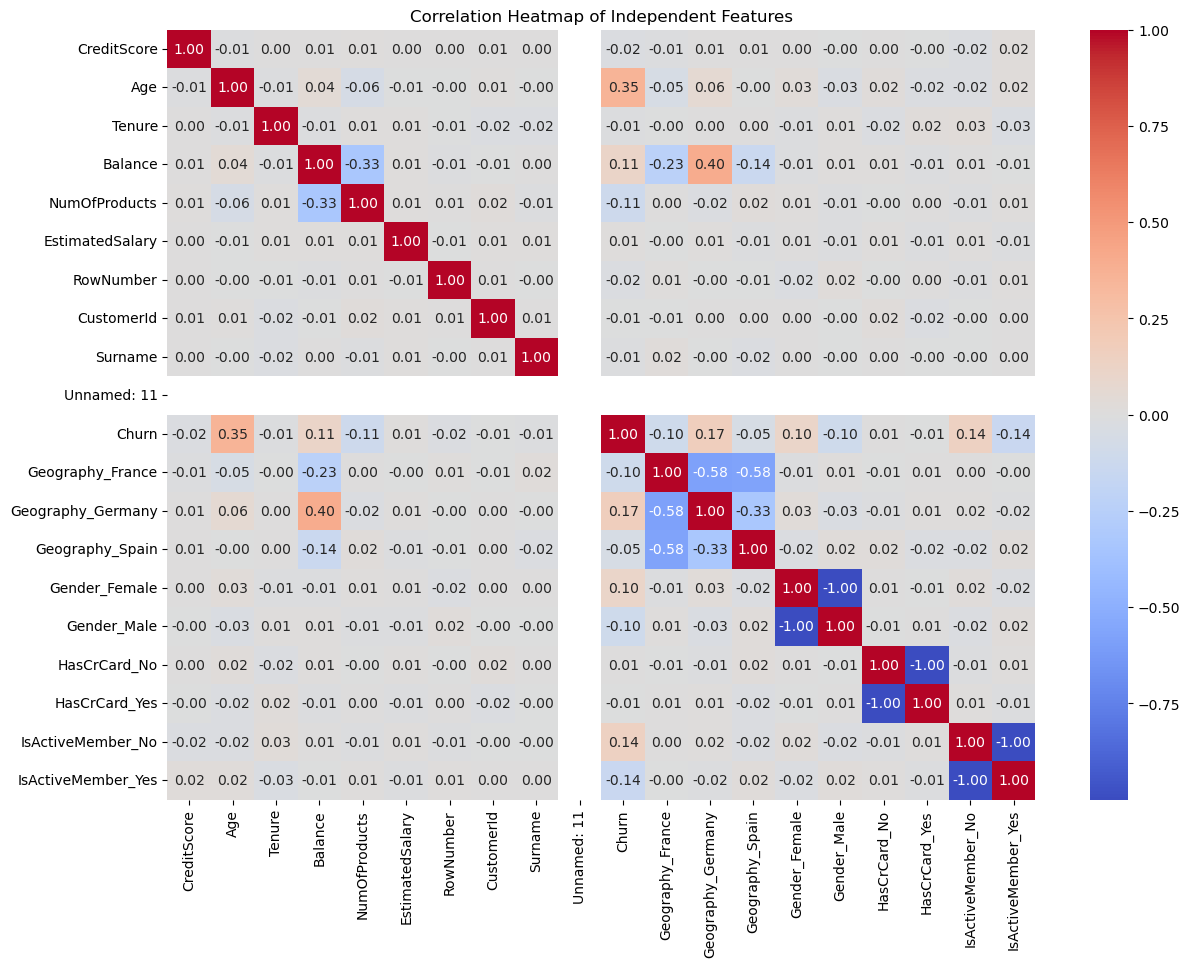

In [66]:
#Computing correlation among all independent features and demonstrate using a heatmap
correlation_matrix = all_features.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Independent Features')
plt.show()

### Section 5

In [68]:
#importing libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Load the original dataset

df1= pd.read_csv('Churn_Modelling_24.csv')

label_encoder = LabelEncoder()
df1['Churn'] = label_encoder.fit_transform(df1['Churn'])

# Identify independent features (X) and the dependent variable (y)
X = df1.drop('Churn', axis=1)  # All features except 'Churn'
y = df1['Churn']  # Dependent variable

label_encoder = LabelEncoder()
df1['Churn'] = label_encoder.fit_transform(df1['Churn'])



In [69]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,NaN,Yes,Yes,1
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,NaN,No,Yes,0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,NaN,Yes,No,1
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,NaN,No,No,0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,NaN,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0
